# Data Mining Lab 1 homework
In this lab session we will focus on the use of scientific computing libraries to efficiently process, transform, and manage data. We will also provide best practices and introduce visualization tools for effectively conducting big data analysis. Furthermore, we will show you how to implement basic classification techniques.

---

In [134]:
# This section is for loading the new dataset into df 
import pandas as pd
import helpers.data_mining_helpers as dmh
# Relative file path
file_path = r"Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

       sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...


In [135]:
# add 'wordsCnt' column to the dataframe
def count_words(comment):
    return len(comment.split())
df['wordsCnt'] = df['comment'].apply(count_words)

In [136]:
# add length label also
def assign_length(wordCnt):
    return 'long' if wordCnt > 30 else 'short'
df['length'] = df['wordsCnt'].apply(assign_length)

In [137]:
# define categorise 
categories = ['nostalgia', 'not nostalgia']
# Map each category to an index and assign it to a new column
df['category'] = df['sentiment'].map({category: index for index, category in enumerate(categories)})

Now we can print and see what our table looks like. 

In [138]:
df[:8] # After 2 columns added (show the first 8 records)

,sentiment,comment,wordsCnt,length,category
0,not nostalgia,He was a singer with a golden voice that I lov...,60,long,1
1,nostalgia,The mist beautiful voice ever I listened to hi...,26,short,0
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,74,long,0
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,68,long,1
4,nostalgia,listening to his songs reminds me of my mum wh...,13,short,0
5,nostalgia,"Every time I heard this song as a child, I use...",39,long,0
6,nostalgia,"My dad loved listening to Jim Reeves, when I w...",27,short,0
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...,34,long,0


### 3.2 Familiarizing yourself with the Data

In [139]:
# a simple query (following 3 columns)
df[:15][['sentiment', 'length', 'wordsCnt']]

,sentiment,length,wordsCnt
0,not nostalgia,long,60
1,nostalgia,short,26
2,nostalgia,long,74
3,not nostalgia,long,68
4,nostalgia,short,13
5,nostalgia,long,39
6,nostalgia,short,27
7,nostalgia,long,34
8,not nostalgia,short,8
9,not nostalgia,short,22


Let us look at a few more interesting queries to familiarize ourselves with the efficiency and conveniency of Pandas dataframes.

#### Let's query the last 10 records

In [140]:
df[-10:]

,sentiment,comment,wordsCnt,length,category
1490,not nostalgia,"He really isn't my cup of tea, but some of his...",18,short,1
1491,nostalgia,real music...how i miss those days...brings ba...,23,short,0
1492,nostalgia,i used to cry over this song cause i had a boy...,39,long,0
1493,not nostalgia,"He really has that ""love you like a brother"" l...",42,long,1
1494,not nostalgia,That's funny. But Leo really is a nice guy. He...,35,long,1
1495,not nostalgia,"i don't know!..but the opening of the video,.....",25,short,1
1496,not nostalgia,it's sad this is such a beautiful song when yo...,22,short,1
1497,not nostalgia,"Dear Friend, I think age and time is not that ...",23,short,1
1498,nostalgia,I was born in 1954 and started to be aware of ...,62,long,0
1499,nostalgia,This is the first CD I bought after my marriag...,43,long,0


Ready for some sourcery? Brace yourselves! Let us see if we can query the first 10th record in our dataframe. For this we will use the build-in function called `loc`. This allows us to explicity define the columns you want to query.

In [141]:
# using loc 
df.loc[:11, 'comment']

0     He was a singer with a golden voice that I lov...
1     The mist beautiful voice ever I listened to hi...
2     I have most of Mr. Reeves songs.  Always love ...
3     30 day leave from 1st tour in Viet Nam to conv...
4     listening to his songs reminds me of my mum wh...
5     Every time I heard this song as a child, I use...
6     My dad loved listening to Jim Reeves, when I w...
7     i HAVE ALSO LISTENED TO Jim Reeves since child...
8              Wherever you  are you always in my heart
9     Elvis will always be number one no one can com...
10    ill bet if they begin to play this song on the...
11    this song came out my senior year in high scho...
Name: comment, dtype: object

You can also use the `iloc` function to query a selection of our dataset by position. Take a look at this [great discussion](https://stackoverflow.com/questions/28757389/pandas-loc-vs-iloc-vs-ix-vs-at-vs-iat/43968774) on the differences between the `iloc` and `loc` functions.

In [142]:
# using iloc (by position)
df.iloc[:10, 0]
# zere in above means the first(0th) column.
# you can take iloc and loc as a function having two parameters [row-index specifier, column-key specifier] 

0    not nostalgia
1        nostalgia
2        nostalgia
3    not nostalgia
4        nostalgia
5        nostalgia
6        nostalgia
7        nostalgia
8    not nostalgia
9    not nostalgia
Name: sentiment, dtype: object

### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [143]:
#Answer here
#Muti-axes selection
#Show the "category_name" for those records with even index by using loc method
df.loc[range(0, 15, 2), "sentiment"]



0     not nostalgia
2         nostalgia
4         nostalgia
6         nostalgia
8     not nostalgia
10    not nostalgia
12        nostalgia
14    not nostalgia
Name: sentiment, dtype: object

---

### **>>> Exercise 3 (Watch Video):**  
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [144]:
# Answer here
# df[row codition][column condition] -> this return the sub_dataframe of df which satisfy the conditions
# query the first 5 records with index belonging to {1+10n | n belongs to nonnegtive integer} and with their lenght = 'short' 
df[df[::]['sentiment'] == 'nostalgia'].loc[::10][0:5]

,sentiment,comment,wordsCnt,length,category
1,nostalgia,The mist beautiful voice ever I listened to hi...,26,short,0
18,nostalgia,"My Grandparents had a pub in the 1970's, this ...",41,long,0
32,nostalgia,I remember my Mom listening to Jim over and ov...,25,short,0
50,nostalgia,"If I remember correctly, this song came out af...",39,long,0
71,nostalgia,Gosh does this bring back memories. Nearly eve...,51,long,0


---

## 4. Data Mining using Pandas

### 4.1 Missing Values

In [145]:
# check missing values (just for first 10 records)
df[0:10][['comment', 'wordsCnt', 'length']].isnull()

,comment,wordsCnt,length
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [146]:
# this method is used to count the total number of missing values
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=0)

,sentiment,comment,wordsCnt,length,category
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0


### >>> **Exercise 4 (Watch Video):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [147]:
# Answer here
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)[0:10]

0    (The amoung of missing records is: , 0)
1    (The amoung of missing records is: , 0)
2    (The amoung of missing records is: , 0)
3    (The amoung of missing records is: , 0)
4    (The amoung of missing records is: , 0)
5    (The amoung of missing records is: , 0)
6    (The amoung of missing records is: , 0)
7    (The amoung of missing records is: , 0)
8    (The amoung of missing records is: , 0)
9    (The amoung of missing records is: , 0)
dtype: object

In [148]:
dummy_series = pd.Series(["dummy_record", 1], index=["comment", "wordsCnt"])

In [149]:
dummy_series.to_frame().T

,comment,wordsCnt
0,dummy_record,1


In [150]:
#add the dummy record into df (note: this dummy record only contain partial information i.e. missing the 'sentiment' and 'length' attributes)
result_with_series = pd.concat([df, dummy_series.to_frame().T], ignore_index=True)

In [151]:
# There are 2 missing values one in sentiment and another in length. Both of them are form the dummy_series we added.
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment,wordsCnt,length,category
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,1,0,0,1,1


Indeed there is a missing value in this new dataframe. Specifically, the missing value comes from the `category_name` attribute. As I mentioned before, there are many ways to conduct specific operations on the dataframes. In this case let us use a simple dictionary and try to insert it into our original dataframe `X`. Notice that above we are not changing the `X` dataframe as results are directly applied to the assignment variable provided. But in the event that we just want to keep things simple, we can just directly apply the changes to `X` and assign it to itself as we will do below. This modification will create a need to remove this dummy record later on, which means that we need to learn more about Pandas dataframes. This is getting intense! But just relax, everything will be fine!

In [152]:
# dummy record as dictionary format
dummy_dict = [{'comment': 'dummy_record',
               'wordsCnt': 1
              },
              {'comment': 'dummy_record',
               'wordsCnt': 1
              }
             ]

In [153]:
df = pd.concat([df, pd.DataFrame(dummy_dict)], ignore_index=True)

In [154]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment,wordsCnt,length,category
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,2,0,0,2,2


So now that we can see that our data has missing values, we want to remove the records with missing values. The code to drop the record with missing that we just added, is the following:

In [155]:
df.dropna(inplace=True) # remove the records with missing values

In [156]:
df.isnull().apply(lambda x: dmh.check_missing_values(x)) # no missing value after dropping

,sentiment,comment,wordsCnt,length,category
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0


In [157]:
len(df) # Check the number of records are same as the initial df.

1500

In [158]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [159]:
sum(df.duplicated()) # check the sum of duplicated records

1

In [160]:
# Find the index of the record with duplicated data
def find_dupli_records(data_with_duplication):
    dup_lst = []
    dls = data_with_duplication.duplicated()
    for i in range(len(dls)):
        if dls[i] == True:
            dup_lst.append(i)
    return dup_lst 
print(find_dupli_records(df))    

[78]


In [161]:
# Indicate excately the two records with same content   
reference_comment = df.loc[78, 'comment']
dupli_records = df[df['comment'] == reference_comment]
dupli_records

,sentiment,comment,wordsCnt,length,category
62,not nostalgia,never heard this song before... WOW What an am...,13,short,1.0
78,not nostalgia,never heard this song before... WOW What an am...,13,short,1.0


In [162]:
sum(df.duplicated('comment'))

1

In [163]:
# Here, I leave one duplicated record in my df rather then dropping all of the duplicated records. 
df.drop_duplicates(keep='first', inplace=True) 

In [164]:
len(df) # a duplicated record is dropped

1499

## 5.  Data Preprocessing

### 5.1 Sampling

In [165]:
df_sample = df.sample(n=300, random_state=45) # set random_state to fix the sampling result generated every execution

In [166]:
len(df_sample) # sample 300 records from the original 1499 records in df.

300

In [167]:
df_sample[0:10] # Show the partial sampling result

,sentiment,comment,wordsCnt,length,category
105,not nostalgia,I think when Princilla left him it all started...,36,long,1.0
119,nostalgia,Rip sweet mum how I miss you so and this song ...,23,short,0.0
775,not nostalgia,"Great song, great images, poor arrangement. Th...",13,short,1.0
1408,nostalgia,what the?! what kind of rapping is this? 1988...,37,long,0.0
778,not nostalgia,Brilliant. Makes my heart feel good. Thinking ...,34,long,1.0
507,nostalgia,"I like this song very much, when I was in the ...",91,long,0.0
441,not nostalgia,I know the songs good but please don???t like ...,19,short,1.0
662,not nostalgia,Everyone that sees you work forgets to say any...,74,long,1.0
1130,nostalgia,Funny how when this song came out it was about...,66,long,0.0
976,not nostalgia,I heard this from my father and found this whi...,30,short,1.0


### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

Text(0.5, 1.0, 'Comparison of Ratios before/after sampling')

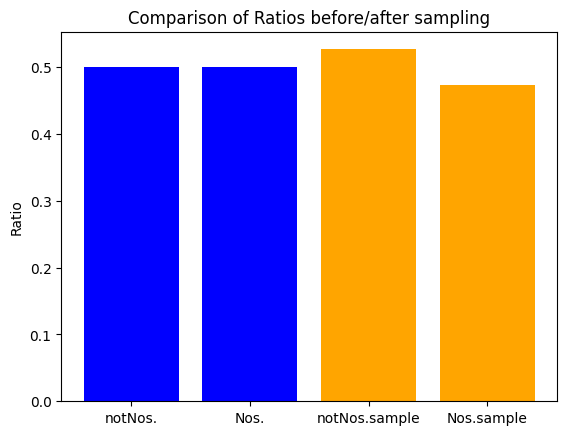

In [168]:
# Answer here
'''
The size of dataframe decrease and the order of records is shuffled.
Additionally, the ratio of number of records belonging to each sentimental categroy may change a little bit. 
However, there are very little changes in overall ratio for every sentimental categories which is good for sampling. (We avoid sampling baised data.)
'''
import matplotlib.pyplot as plt
notNos_count = (df['sentiment'] == 'not nostalgia').sum()
Nos_count = (df['sentiment'] == 'nostalgia').sum()
notNos_count_sample = (df_sample['sentiment'] == 'not nostalgia').sum()
Nos_count_sample = (df_sample['sentiment'] == 'nostalgia').sum()

# Calculate ratios
ratios = [
    notNos_count / (notNos_count + Nos_count),
    Nos_count / (notNos_count + Nos_count),
    notNos_count_sample / (notNos_count_sample + Nos_count_sample),
    Nos_count_sample / (notNos_count_sample + Nos_count_sample)
]

# Bar plot
labels = ['notNos.', 'Nos.', 'notNos.sample', 'Nos.sample']
plt.bar(labels, ratios, color=['blue', 'blue', 'orange', 'orange'])
plt.ylabel('Ratio')
plt.title('Comparison of Ratios before/after sampling')

In [169]:
import matplotlib.pyplot as plt
%matplotlib inline

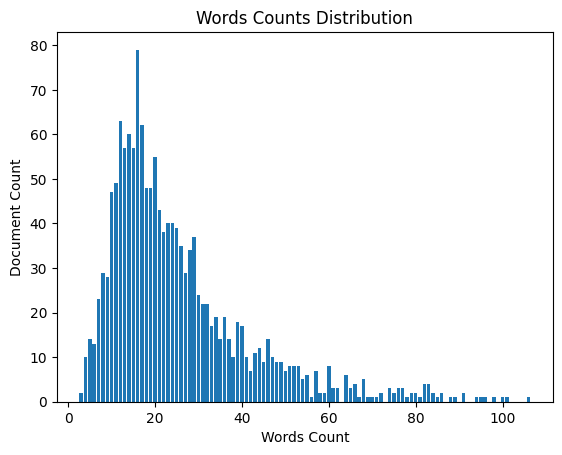

In [170]:
# This cell is for demostration of how to use matplot to get a bar plot.
# Below I show the distribution of words count all over the new dataset(df).


value_cnts = df.wordsCnt.value_counts()

# Convert Series to DataFrame and reset index
value_cnts_df = value_cnts.reset_index()
value_cnts_df.columns = ['wordsCnt', 'count']

# Sort the DataFrame by 'wordsCnt'
value_cnts_df = value_cnts_df.sort_values(by='wordsCnt')


# Plotting
plt.bar(value_cnts_df['wordsCnt'], value_cnts_df['count'])
plt.xlabel('Words Count')
plt.ylabel('Document Count')
plt.title('Words Counts Distribution')
plt.show()


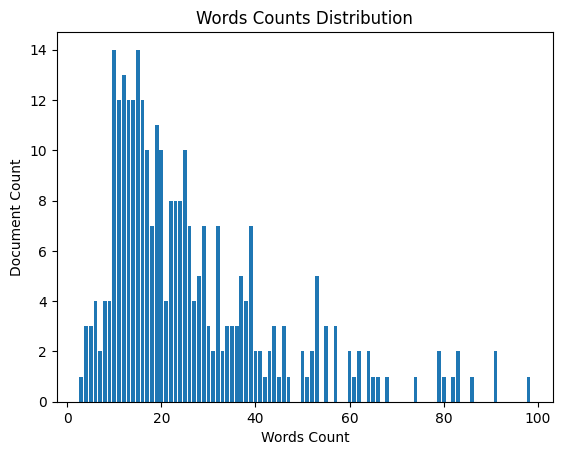

In [171]:
# plot the Words Counts Distribution for df_sample
value_cnts = df_sample.wordsCnt.value_counts()

# Convert Series to DataFrame and reset index
value_cnts_df_s = value_cnts.reset_index()
value_cnts_df_s.columns = ['wordsCnt', 'count']

# Sort the DataFrame by 'wordsCnt'
value_cnts_df_s = value_cnts_df_s.sort_values(by='wordsCnt')

# Plotting
plt.bar(value_cnts_df_s['wordsCnt'], value_cnts_df_s['count'])
plt.xlabel('Words Count')
plt.ylabel('Document Count')
plt.title('Words Counts Distribution')
plt.show()


### >>> **Exercise 7 (Watch Video):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

<Axes: title={'center': 'words counts distribution'}, xlabel='wordsCnt'>

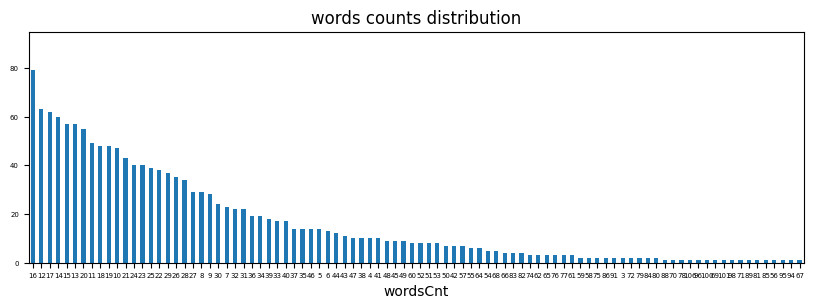

In [172]:
# Answer here
upper_bound = max(df.wordsCnt.value_counts())*1.2 # Set the ceiling to be the 1.2 times of the longest bar
# plot barchart for df
df.wordsCnt.value_counts().plot(kind = 'bar',
                                    title = 'words counts distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 5, figsize = (10,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment'>

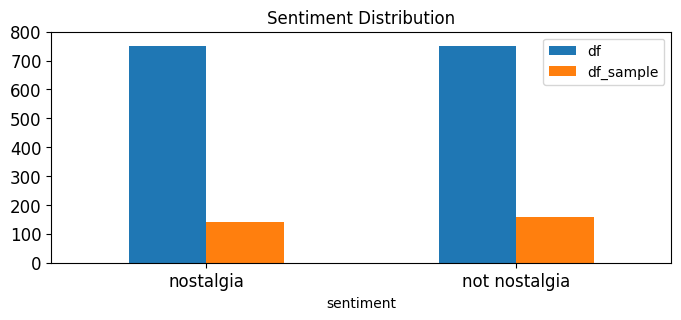

In [173]:
# Answer here
counts_df = df.sentiment.value_counts()
counts_df_sample = df_sample.sentiment.value_counts()
df_counts = pd.DataFrame({'df': counts_df, 'df_sample': counts_df_sample}).fillna(0)

# Plot the DataFrame with bars side by side
df_counts.plot(kind='bar', ylim=[0, 800], rot=0, fontsize=12, figsize=(8, 3), title='Sentiment Distribution')

### 5.2 Feature Creation

In [174]:
import nltk

In [175]:
# Apply the function to DataFrame (df) and add it to df as wa new column 'unigrams'
df['unigrams'] = df['comment'].apply(lambda x: dmh.tokenize_text(x))


In [176]:
df[0:6]["unigrams"]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
4    [listening, to, his, songs, reminds, me, of, m...
5    [Every, time, I, heard, this, song, as, a, chi...
Name: unigrams, dtype: object

In [177]:
df[0:4]

,sentiment,comment,wordsCnt,length,category,unigrams
0,not nostalgia,He was a singer with a golden voice that I lov...,60,long,1.0,"[He, was, a, singer, with, a, golden, voice, t..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,26,short,0.0,"[The, mist, beautiful, voice, ever, I, listene..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,74,long,0.0,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,68,long,1.0,"[30, day, leave, from, 1st, tour, in, Viet, Na..."


In [178]:
list(df[0:1]['unigrams'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

### 5.3 Feature subset selection

In [179]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
df_tfidf = tfidf_vect.fit_transform(df.comment)  # Learn the vocabulary and return document-TFIDF matrix


In [180]:
print(df_tfidf)

  (0, 1598)	0.10512815802912398
  (0, 3570)	0.1395574769171071
  (0, 2973)	0.13337780025660986
  (0, 3650)	0.09117642312434776
  (0, 1470)	0.17742470356320433
  (0, 3534)	0.10560382174971122
  (0, 3282)	0.08099760357962565
  (0, 2028)	0.08426437228313143
  (0, 3336)	0.05656163791989449
  (0, 1606)	0.11892115591975148
  (0, 233)	0.19791015577918225
  (0, 3284)	0.1516330924946833
  (0, 3328)	0.18797687737677285
  (0, 1651)	0.22761435073116082
  (0, 1512)	0.09515621480982876
  (0, 1249)	0.19852539212933534
  (0, 323)	0.10633155023896874
  (0, 214)	0.14662969149477417
  (0, 2341)	0.061599247801622355
  (0, 15)	0.23196919224604873
  (0, 1733)	0.06689075657536095
  (0, 3304)	0.12462022324106113
  (0, 907)	0.11318589137806082
  (0, 258)	0.11457641683536417
  (0, 3124)	0.11082028545327519
  :	:
  (1498, 2254)	0.11862818002855156
  (1498, 1798)	0.07680587844223077
  (1498, 3704)	0.19216392413911518
  (1498, 1923)	0.16083530896416567
  (1498, 3300)	0.15015304146671557
  (1498, 3044)	0.1143173648

In [181]:
tfidf_vect.get_feature_names_out()[:25] # Show the content in cnt_vect after learning the vocabulary of comment

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12',
       '13', '14', '15', '150', '16', '16years', '17', '17th', '18', '19',
       '1927', '1930', '1930s', '1950', '1950s'], dtype=object)

### **>>> Exercise 9 (Watch Video):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [182]:
analyze = tfidf_vect.build_analyzer()
analyze(df.comment[0]) 

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [183]:
# We can check the shape of this matrix by:
df_tfidf.shape

(1499, 3730)

In [184]:
# We can obtain the feature names of the vectorizer, i.e., the terms
tfidf_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [185]:
# we convert from sparse array to normal array
df_tfidf[0:5, 0:25].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.23196919, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14020461, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.

As you can see the result is just this huge sparse matrix, which is computationally intensive to generate and difficult to visualize. But we can see that the fifth record, specifically, contains a `1` in the beginning, which from our feature names we can deduce that this article contains exactly one `00` term.

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [186]:
# Answer here, I show the 3 terms in 4-th document that you can see in the above array.  
positions = []
fourth_subarray = df_tfidf[3:4, 0:100].toarray()
for i in range(100):
    if fourth_subarray[0][i] != 0:
        positions.append(i)
        
terms = [tfidf_vect.get_feature_names_out()[p] for p in positions]
print(terms)

['1st', '2nd', '30']


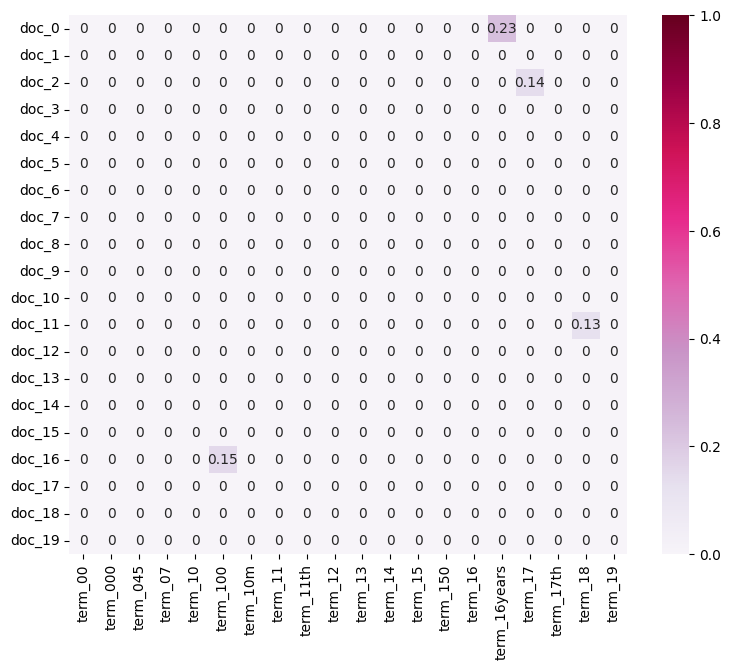

In [187]:
import seaborn as sns
# prepare the plot info.
plot_x = ["term_"+str(i) for i in tfidf_vect.get_feature_names_out()[0:20]] # first twenty features only
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]] # obtain document index (first 20 only)
plot_z = df_tfidf[0:20, 0:20].toarray() #df_tfidf [y-range (doc), x-range(terms)]

# Create a dataframe to draw our heatmap
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
# draw the heat map by seaborn
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

Check out more beautiful color palettes here: https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/

---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

"\nTake sample of the original dataframe with sample size 20 by 20 (for proper visulization scope).\nSort by any attribute. For example, I sorted the sampling dataframe by 'sentiment'.\nYou might have more chance to see a denser heatmap.\n"

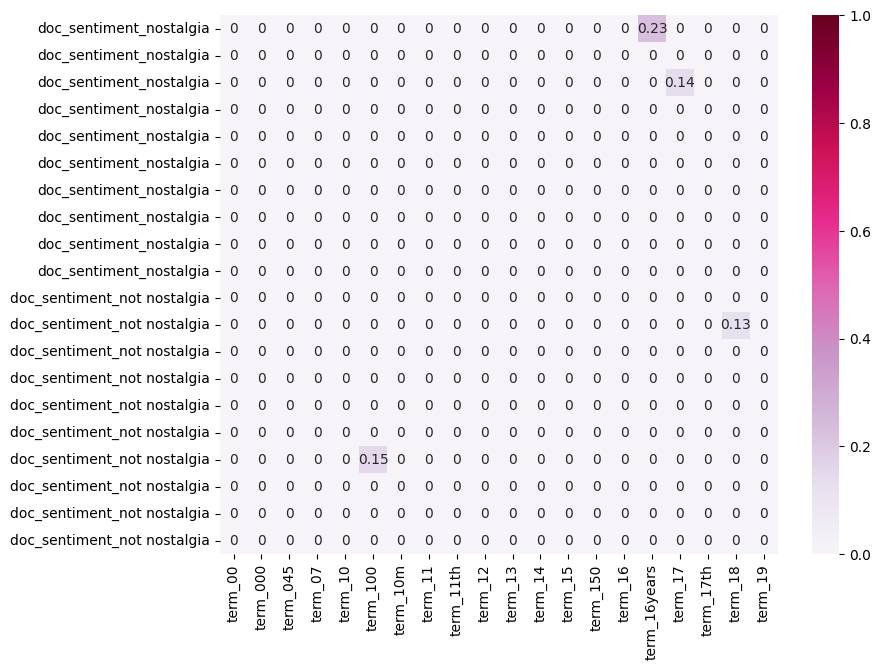

In [188]:
# Answer here

tfidf_vec = TfidfVectorizer()
S = df.sample(n=20, random_state=7330) # S is small size sample of df 
S_sorted = S.sort_values(by='sentiment') # S_sorted is the result
S_sorted_tfidf = tfidf_vec.fit_transform(df.comment)
# define the x, y, and z value
plot_Sx = ["term_"+str(i) for i in tfidf_vec.get_feature_names_out()[0:20]]
plot_Sy = ["doc_sentiment_"+i for i in list(S_sorted.sentiment)[0:20]]
plot_Sz = S_sorted_tfidf[0:20, 0:20].toarray()

df_drawSample = pd.DataFrame(plot_Sz, columns = plot_Sx, index = plot_Sy)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_drawSample,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)
'''
Take sample of the original dataframe with sample size 20 by 20 (for proper visulization scope).
Sort by any attribute. For example, I sorted the sampling dataframe by 'sentiment'.
You might have more chance to see a denser heatmap.
'''

### 5.4 Attribute Transformation / Aggregation

In [189]:
import numpy as np #Use numpy to compute 
tfidfrequencies = np.asarray(df_tfidf.sum(axis=0))[0] 
print(tfidfrequencies[0:20])

[0.34184061 0.32261779 0.18634526 0.52308493 3.71077962 1.2689179
 0.23509685 1.97696185 0.27433056 2.57398283 2.69603763 3.09337247
 2.20267258 0.37943678 3.80586526 0.23196919 2.87610866 0.40291711
 2.40839975 1.51614954]


In [190]:
print(tfidf_vect.get_feature_names_out().shape)

(3730,)


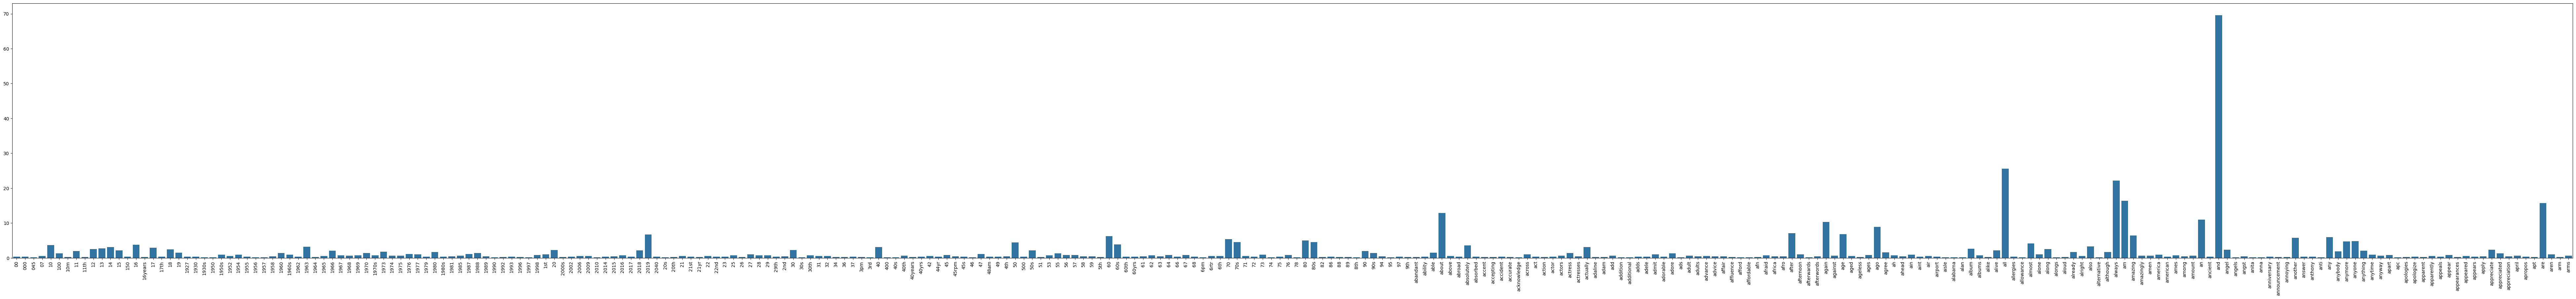

In [191]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=tfidf_vect.get_feature_names_out()[:300], 
                y=tfidfrequencies[:300])
g.set_xticks(range(300))
# Rotate x-axis labels
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

---

### >>> **Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [192]:
# Answer here
import plotly.graph_objects as py

# Determine x_axis and y_axis
term_list = tfidf_vect.get_feature_names_out()[:300]
freq_list = tfidfrequencies[:300]

# Set the figure 
fig = py.Figure(
    data=[py.Bar(x=term_list, y=freq_list)]
)
# Set the output appearance of figure 
fig.update_layout(
    xaxis_tickangle=90,  # Rotates x-axis labels
    height=600,          # Adjust the height (in px)
    width=1000           # Adjust the width (in px)
)

# Show the plot
fig.show()


---

### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [193]:
# Answer here
'''
I use filtter method which can fillter out those terms with their frequency lower than a threshold.
Similarly, we can also set a overshoot value (similar to threshold) used to fillter out terms with their frequency greater than overshoot value.
I combined these two into my following code.
'''
x_axis = tfidf_vect.get_feature_names_out()
y_axis = tfidfrequencies


threshold = 10
overshoot = 300
filtered_indices = np.where((y_axis > threshold) & (y_axis < overshoot))[0]
x_filtered = x_axis[filtered_indices]
y_filtered = y_axis[filtered_indices]

fig_new = py.Figure(
    data=[py.Bar(x=x_filtered, y=y_filtered)]
)

# Customize the layout
fig_new.update_layout(
    xaxis_title='Features',
    yaxis_title='Frequencies',
    xaxis_tickangle=90, 
    height=500,         
    width=1300          
)

print(len(x_filtered), len(y_filtered))
fig_new.show()


122 122


### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [194]:
# Answer here
sorted_pairs = sorted(zip(y_filtered, x_filtered), reverse=True) # high -> low

# Unzipping the sorted pairs back into separate lists
y_sorted, x_sorted = zip(*sorted_pairs)



# Set the figure 
fig_sorted = py.Figure(
    data=[py.Bar(x=x_sorted, y=y_sorted)]
)
# Set the output appearance of figure 
fig_sorted.update_layout(
    xaxis_tickangle=90,  
    height=600,          
    width=1000          
)

# Show the plot
fig_sorted.show()


---

In [195]:
import math
tfidfrequencies_log = [math.log(i) for i in tfidfrequencies]

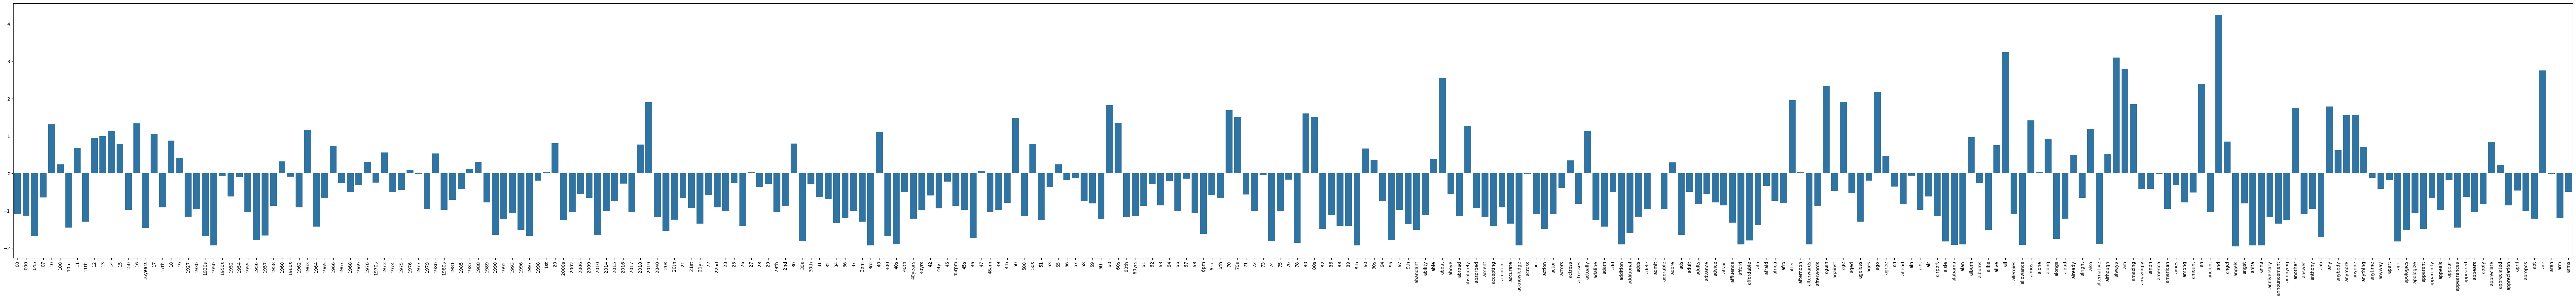

In [196]:
# Show the TFIDF after apply log function
'''
note that because the TFIDF values have been normalized by document number their values
may be less than 1. The log transformation is not a good way to deal with TFIDF matrix. 
'''
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=tfidf_vect.get_feature_names_out()[:300],
                y=tfidfrequencies_log[:300])
g.set_xticks(range(300))
g.set_xticklabels(tfidf_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

In [197]:
# Answer here

y_log = [math.log(i) for i in y_sorted] 

# Set the figure 
fig_log = py.Figure(
    data=[py.Bar(x=x_sorted, y=y_log)]
)
# Set the output appearance of figure 
fig_log.update_layout(
    xaxis_tickangle=90,  
    height=600,          
    width=1000,
    yaxis=dict(
        range=[0, 10]  # Only set the maximum limit to 30
    )
)
# Show the plot
fig_log.show()
'''
The plot become more linear (although not excatly linear) after apply log function on frequencies.
Additionally, the range of y-axis (y-scope) is 'compressed' to a smaller region that could have benefits if having a few values which are extremely large. 
'''

"\nThe plot become more linear (although not excatly linear) after apply log function on frequencies.\nAdditionally, the range of y-axis (y-scope) is 'compressed' to a smaller region that could have benefits if having a few values which are extremely large. \n"

In [198]:
# this cell is for separarted the all comments into 2 dataframes one for nostalgia and another for not nostalgia 
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

#Create separate DataFrames for each sentiment
sentiments = df['sentiment'].unique()  # [not nostalgia, nostalgia]
sentiment_dfs = {}  # Dictionary to store DataFrames for each sentiment

for category in sentiments:
    # subdivide the original DataFrame by sentiment
    sentiment_dfs[category] = df[df['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for both sentiments
def create_tfidf_df(df):
    tfidf_vect = TfidfVectorizer()  # Initialize the CountVectorizer
    tfidf_counts = tfidf_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = tfidf_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    tfidf_df = pd.DataFrame(tfidf_counts.toarray(), columns=words)
    
    return tfidf_df

# Create term-document frequency DataFrames for each sentiment
filt_tfidf_dfs = {}  # Dictionary to store term-document DataFrames for each sentiment

for category in sentiments:
    filt_tfidf_dfs[category] = create_tfidf_df(sentiment_dfs[category])

In [199]:
# Delete this cell
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
sentiment_number=1 # You can change it from 0 to 1
print(f"Filtered Term-Document Frequency DataFrame for Category {sentiments[sentiment_number]}:")
filt_tfidf_dfs[sentiments[sentiment_number]]

Filtered Term-Document Frequency DataFrame for Category nostalgia:


,07,10,11,11th,12,13,14,15,16,17,...,young,younger,youngster,your,yours,youth,youthful,youtube,yrs,yup
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.135932,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.196577,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.355567
746,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
747,0.0,0.0,0.0,0.0,0.0,0.225266,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
748,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [200]:
import plotly.graph_objects as go

# Sum over all documents to get total frequency for each word
sentiment_number = 1  # You can change it from 0 to 1
tfidf_counts = filt_tfidf_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()

# Print the first 30 word counts for reference
print(tfidf_counts[:30])

# Visualize the frequency distribution with Plotly
fig = go.Figure(
    data=[go.Histogram(
        x=tfidf_counts,
        nbinsx=5000,
        marker_color='blue',
        marker_line_color='blue'
    )]
)

# Customize the layout
fig.update_layout(
    title=f'Term Frequency Distribution for sentiment {sentiments[sentiment_number]}',
    xaxis_title='Frequency',
    yaxis_title='Number of Terms',
    xaxis=dict(range=[1, 200]),
    width=800,
    height=500
)

# Show the plot
fig.show()



[0.51340393 2.81644307 1.22798232 0.2671675  2.00393534 2.61268177
 2.03781411 1.50878879 2.35477855 1.68364965 1.54504899 1.03524251
 0.31007011 0.14326558 0.88214567 0.36396262 0.41663138 0.15926618
 0.71571672 0.56470619 0.39678016 2.8703439  0.23434277 0.32673742
 1.64132547 0.58381156 0.53463728 1.03008336 0.77494475 1.51362339]


In [201]:
sentiment_number=1 #You can change it from 0 to 1
tfidf_counts = filt_tfidf_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()

# Sort the tfidf in descending order
sorted_indices = np.argsort(tfidf_counts)[::-1]  # Get indices of sorted tfidf
sorted_counts = np.sort(tfidf_counts)[::-1]  # Sort tfidf in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_tfidf_dfs[sentiments[sentiment_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Sentiment: {sentiments[sentiment_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Sentiment: nostalgia
Number of terms in top 5%: 114
Filtered terms: ['the', 'my', 'this', 'to', 'song', 'and', 'was', 'of', 'back', 'me', 'memories', 'it', 'in', 'when', 'so', 'love', 'brings', 'years', 'time', 'you', 'remember', 'childhood', 'for', 'that', 'old', 'beautiful', 'great', 'reminds', 'on', 'days', 'music', 'good', 'is', 'miss', 'with', 'all', 'many', 'dad', 'songs', 'always', 'from', 'we', 'as', 'but', 'now', 'listening', 'much', 'at', 'still', 'first', 'her', 'just', 'times', 'young', 'those', 'school', 'loved', 'he', 'very', 'thank', 'best', 'had', 'happy', 'she', 'used', 'his', 'have', 'up', 'these', 'listen', 'am', 'every', 'like', 'takes', 'were', 'what', 'voice', 'him', 'one', 'thanks', 'they', 'played', 'heard', 'hear', 'bring', 'can', 'sing', 'mom', 'never', 'be', 'how', 'life', 'again', 'ago', 'really', 'some', 'nostalgic', 'then', 'kid', 'are', 'wish', 'makes', 'play', 'not', 'mum', 'favorite', 'day', 'radio', 'go', 'out', 'wonderful', 'memory', 'little', 'singin

Here we can explore the frequencies of the **top 5%** words:

In [202]:
sorted_counts #We can see the tfidf sorted in a descending order

array([48.19389537, 45.72673192, 43.1876941 , ...,  0.1339963 ,
        0.11892223,  0.11892223])

In [203]:
sorted_indices #This are the indices corresponding to the words after being sorted in a descending order

array([2011, 1403, 2026, ...,  186, 2065, 1063], dtype=int64)

In [204]:
filt_tfidf_dfs[sentiments[sentiment_number]].loc[:,'the'].sum(axis=0) #Here we can sum up the column corresponding to the top 5% words, we just specify which one first.

48.193895372037616

In [205]:
sentiment_number=0 #You can change it from 0 to 1
tfidf_counts = filt_tfidf_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(tfidf_counts)  # Get indices of sorted frequencies
sorted_counts = tfidf_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_tfidf_dfs[sentiments[sentiment_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {sentiments[sentiment_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: not nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['excited', 'wondering', 'whispering', 'familiar', 'vice', 'versa', 'following', 'ears', 'minds', 'miles', '67', 'basic', 'conclusion', 'points', 'profane', 'non', 'illicit', 'realise', 'bold', 'existent', 'historic', 'alternative', 'explicit', 'fossils', '40s', 'kissing']


Here we can explore the frequencies of the **bottom 1%** words:

In [206]:
sorted_counts #We can see the tfidf sorted in an ascending order

array([ 0.10823554,  0.14223714,  0.14223714, ..., 35.40024223,
       39.5694641 , 48.81383532])

In [207]:
sorted_indices #This are the indices corresponding to the words after being sorted in an ascending order

array([ 815, 2556, 2524, ...,  160, 2290, 2276], dtype=int64)

In [208]:
filt_tfidf_dfs[sentiments[sentiment_number]].loc[:,'mocking'].sum(axis=0) #Here we can sum up the column corresponding to the bottom 1% words, we just specify which one first.

0.16482104016067314

Well done, now that we have seen what type of words are inside the thresholds we set, then we can procede to **filter them out of the dataframe**. If you want to experiment after you complete the lab, you can return to try different percentages to filter, or not filter at all to do all the subsequent tasks for the pattern minings, and see if there is a significant change in the result.

In [209]:
sentiment_number=0 #You can change it from 0 to 1

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
tfidf_dfs = {}

for category in sentiments:
    print(f'\nFor category {category} we filter the following words:')
    tfidf_dfs[category] = filter_top_bottom_words_by_sum(filt_tfidf_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered tfidf DataFrame for Category {sentiments[sentiment_number]}:")
tfidf_dfs[sentiments[sentiment_number]]



For category not nostalgia we filter the following words:
Bottom 1.0% words: 
excited        0.108236
wondering      0.142237
whispering     0.142237
familiar       0.142237
vice           0.142237
versa          0.142237
following      0.142237
ears           0.142237
minds          0.142237
miles          0.142237
67             0.142237
basic          0.142254
conclusion     0.142254
points         0.142254
profane        0.142254
non            0.142254
illicit        0.142254
realise        0.142254
bold           0.142254
existent       0.142254
historic       0.142254
alternative    0.142254
explicit       0.142254
fossils        0.142254
40s            0.142254
kissing        0.142921
dtype: float64
Top 5.0% words: 
favorite     4.672865
country      4.685222
first        4.728963
lyrics       4.749728
did          4.920564
              ...    
song        32.757274
to          33.544608
and         35.400242
this        39.569464
the         48.813835
Length: 130, dtype: flo

,00,000,045,10,100,10m,11,12,14,15,...,younger,youngest,youngsters,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

# Answer here

- Similarities  
    There are a lot of words used in our daily conversation or articles.   
    such as {'the', 'to', 'of', 'and', 'is', 'in', 'for', 'it', 'from', 'you', 'that', 'on', 'this', 'or', 'be', 'with', 'have', 'can', 'are'}. 
    They belong to the top 5% filtered words no matter what categories it is.    
    Some iconic terms for the specific category they belong to can also be found in the top 5% filtered words.  
    For example:  
        {"Childhood", "remind"} can be found in the top 5% filtered words of nostalgia dataframe.  
    
    For the 1% lowest tfidfrequency words, almost all of the tfidfrequencies of them are below 0.2 no matter what categories it is.   
     
    
- Differences  
    The 1% lowest tfidfrequency words are quite different across the different category.  We can notice that there are rare of them can be found in both categories.   
    

In [210]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in tfidf_dfs:
    
    # Avoid errors in the file creation
    category_safe = category.replace(' ', '_')
    
    #convert to a transactional database
    obj = DF2DB(tfidf_dfs[category])            
    obj.convert2TransactionalDatabase(f'tfidf_db_{category_safe}.csv', '>=', 0.1)

Database size (total no of transactions) : 744
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.416666666666666
Maximum Transaction Size : 43
Standard Deviation Transaction Size : 5.952413594380544
Variance in Transaction Sizes : 35.47891431135038
Sparsity : 0.996559007904061


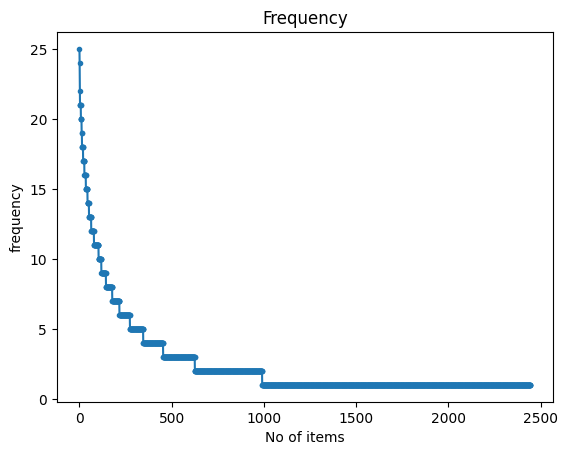

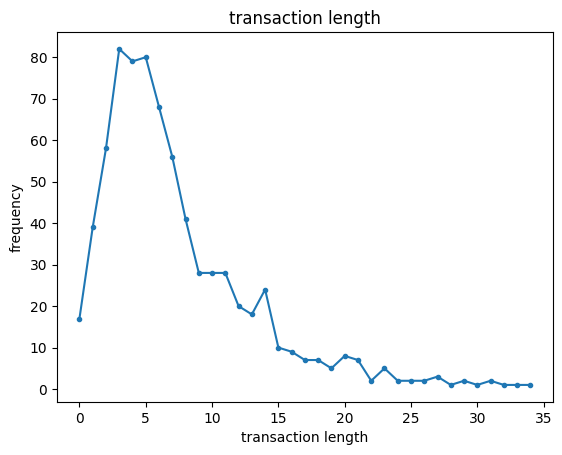

In [211]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('tfidf_db_not_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 728
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.67445054945055
Maximum Transaction Size : 36
Standard Deviation Transaction Size : 7.063666978391647
Variance in Transaction Sizes : 49.964023081457746
Sparsity : 0.9959821905745945


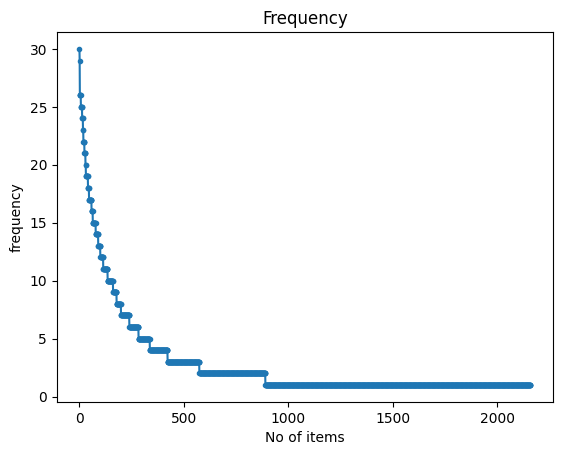

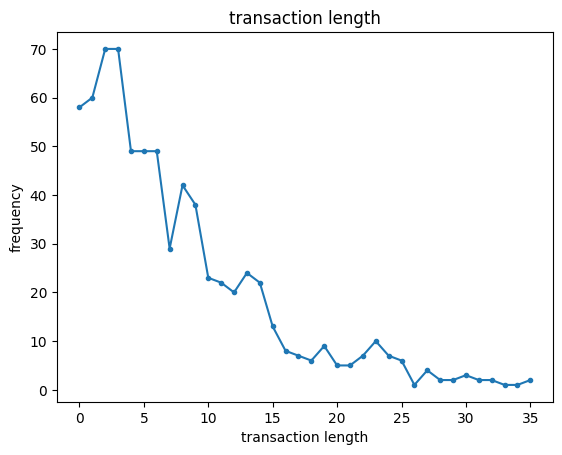

In [212]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('tfidf_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [213]:
from PAMI.frequentPattern.basic import FPGrowth as alg
# Use FPGrowth to find patters in not_nostalgia tranc-data
minSup=9 # Set the min support to be 9 as a threshold 
obj1 = alg.FPGrowth(iFile='tfidf_db_not_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_not_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.013039112091064453


In [214]:
obj1.save('freq_patterns_not_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_not_nostalgia

,Patterns,Support
0,favorites,9
1,special,9
2,soul,9
3,mind,9
4,60,9
...,...,...
139,amazing,21
140,them,21
141,or,22
142,come,24


In [215]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='tfidf_db_nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.01812601089477539


In [216]:
obj2.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_nostalgia

,Patterns,Support
0,find,9
1,down,9
2,few,9
3,its,9
4,sure,9
...,...,...
175,will,26
176,came,26
177,there,26
178,passed,29


In [217]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for d in dfs:
    for pattern in d['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(d) for d in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for d in dfs:
    filtered_df = d[d['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

     Patterns  Support
123       who       30
122    passed       29
121     there       26
120      will       26
119     would       26
..        ...      ...
139  handsome        9
140   perfect        9
141        ll        9
142     happy        9
0         its        9

[212 rows x 2 columns]
Number of patterns discarded: 112


Here we will check each document for the presence of each pattern. If a pattern is found in the document, we'll mark it with a '1'; if it's not present, we'll mark it with a '0'. This binary encoding allows us to effectively augment our data, enhancing its utility for subsequent classification tasks.

In [218]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'comment' column into TF-IDF matrix 
tfidf_vect = TfidfVectorizer()
df_tfidfm = tfidf_vect.fit_transform(df['comment'])  
terms = tfidf_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
df['tokenized_text'] = df['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tfidfm_df = pd.DataFrame(df_tfidfm.toarray(), columns=terms, index=df.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tfidfm_df, pattern_matrix], axis=1)

augmented_df

,00,000,045,07,10,100,10m,11,11th,12,...,please,though,wonder,person,sung,handsome,perfect,ll,happy,its
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance.

In [219]:
# Answer Here
from PAMI.frequentPattern.maximal.MaxFPGrowth import MaxFPGrowth 



# obj_M3 means the obj is formed by MaxFPGrowth algorithm with minSup=3
obj_M3 = MaxFPGrowth(iFile='tfidf_db_nostalgia.csv', minSup=3)
obj_M6 = MaxFPGrowth(iFile='tfidf_db_nostalgia.csv', minSup=6)
obj_M9 = MaxFPGrowth(iFile='tfidf_db_nostalgia.csv', minSup=9)
# Run the algorithm to mine patterns
obj_M3.mine()
obj_M6.mine()
obj_M9.mine()

# Convert mined patterns to a DataFrame
maxFrequentPatternsDF_nostalgia_M3 = obj_M3.getPatternsAsDataFrame()
maxFrequentPatternsDF_nostalgia_M6 = obj_M6.getPatternsAsDataFrame()
maxFrequentPatternsDF_nostalgia_M9 = obj_M9.getPatternsAsDataFrame()

# Print the total number of patterns and the runtime
print('Total No of patterns for MaxFPGrowth with minSup = 3: ' + str(len(maxFrequentPatternsDF_nostalgia_M3)))
print('Total No of patterns for MaxFPGrowth with minSup = 6: ' + str(len(maxFrequentPatternsDF_nostalgia_M6)))
print('Total No of patterns for MaxFPGrowth with minSup = 9: ' + str(len(maxFrequentPatternsDF_nostalgia_M9)))

print('Runtime for MaxFPGrowth with minSup = 3: ' + str(obj_M3.getRuntime()))
print('Runtime for MaxFPGrowth with minSup = 6: ' + str(obj_M6.getRuntime()))
print('Runtime for MaxFPGrowth with minSup = 9: ' + str(obj_M9.getRuntime()))

# Save the patterns to a file
obj_M3.save('max_freq_patterns_nostalgia_minSup3.txt')
obj_M6.save('max_freq_patterns_nostalgia_minSup6.txt')
obj_M9.save('max_freq_patterns_nostalgia_minSup9.txt')




Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns for MaxFPGrowth with minSup = 3: 668
Total No of patterns for MaxFPGrowth with minSup = 6: 274
Total No of patterns for MaxFPGrowth with minSup = 9: 176
Runtime for MaxFPGrowth with minSup = 3: 0.045438289642333984
Runtime for MaxFPGrowth with minSup = 6: 0.029074430465698242
Runtime for MaxFPGrowth with minSup = 9: 0.01492762565612793


In [220]:
from PAMI.frequentPattern.topk.FAE import FAE

# obj_FAE100 means the obj is formed by FAE algorithm with top = 100
obj_FAE100 = FAE(iFile='tfidf_db_nostalgia.csv', k=100) 
obj_FAE200 = FAE(iFile='tfidf_db_nostalgia.csv', k=200)
obj_FAE300 = FAE(iFile='tfidf_db_nostalgia.csv', k=300)

obj_FAE100.mine()
obj_FAE200.mine() 
obj_FAE300.mine() 

# Retrieve patterns as a DataFrame
frequentPatternsDF_nostalgia_top100 = obj_FAE100.getPatternsAsDataFrame()
frequentPatternsDF_nostalgia_top200 = obj_FAE200.getPatternsAsDataFrame()
frequentPatternsDF_nostalgia_top300 = obj_FAE300.getPatternsAsDataFrame()

# Print the total number of patterns and runtime
print('Total No of patterns for FAE top 100: ' + str(len(frequentPatternsDF_nostalgia_top100)))
print('Total No of patterns for FAE top 200: ' + str(len(frequentPatternsDF_nostalgia_top200)))
print('Total No of patterns for FAE top 300: ' + str(len(frequentPatternsDF_nostalgia_top300)))

print('Runtime for FAE top 100: ' + str(obj_FAE100.getRuntime()))  
print('Runtime for FAE top 200: ' + str(obj_FAE200.getRuntime()))
print('Runtime for FAE top 300: ' + str(obj_FAE300.getRuntime()))

# Save the patterns to a file
obj_FAE100.save('freq_patterns_nostalgia_topk_k100.txt')
obj_FAE200.save('freq_patterns_nostalgia_topk_k200.txt')
obj_FAE300.save('freq_patterns_nostalgia_topk_k300.txt')




 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns for FAE top 100: 100
Total No of patterns for FAE top 200: 200
Total No of patterns for FAE top 300: 300
Runtime for FAE top 100: 0.012998580932617188
Runtime for FAE top 200: 0.03198647499084473
Runtime for FAE top 300: 0.04412579536437988


- Similarities  
    - output of patterns  
      The output of pattern FPG and MaxFPG (minsup=9) are almost identical. Both of them capture the similar patterns.
      Furthermore, almost all of the patterns found by FPG, MaxFPG, and FAE topK contain only 1 word since this dataset may not contain patterns   with multiple words.   
    - performance  
      The run time of FPG, MaxFPG, and FAE are less the 0.1 sec in this dataset due to the small scale of this dataset.        
      
          
- Difference  
    - output of patterns
        - For FPGrowth and MaxFPGrowgh  
              The main difference of FPG and MaxFPG (with same minsup = 9) is the number of patterns that MaxFPG found is little less then one FPG found.
              The reason is that MaxFPG focus on find the largest itemsets.
              Moreover, by looking into the patterns MaxFPG found with various minsup=(9, 6, 3), many items which don't show up frequently enough(such as 5)
              will be found by MaxFPG with minsup=3 and won't be found by MaxFPG with minsup=9 and minsup=6. This result also manifest in the No of patterns
              found by MaxFPG with different minsup.
      - For FAE topK  
            The number of the patterns which are found by FAE TopK is exactly equal to the k. This feature can be useful when we want a limited number of result pattern.      
    - performance
      - For FPGrowth and MaxFPGrowgh  
            Performance(run time) significantly depend on the minSup. If minSup is lager, the algorithm will finish earlier due to the ignorance of items which didn't appear frequently. 
      - For FAE TopK  
            Performance(run time) significantly depend on the k. If k is smaller, the algorithm will finish earlier because the algorithm only have to consider the top K patterns.  
        Furthermore, the order of frequenies of patterns found by FAE TopK is in a descending order(most frequent patterns are in the front part) which is different from the ascending order by using FPG and MaxFPG.

# Difference from 20_news dataset
The major difference of the patterns from the dataset analyzed in master notebook is that in 20_news case, there are a lot of patterns with multiple items.  However, here we can seldom find a pattern with multiple items(I only found one).    

---

[PCA Algorithm](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
[t-SNE Algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)
[UMAP Algorithm](https://umap-learn.readthedocs.io/en/latest/basic_usage.html)

**Input:** Raw term-vector matrix

**Output:** Projections 

So, let's experiment with something interesting, from our previous work we have our data with only the document-term frequency data and also the one with both the document-term frequency and the pattern derived data, let's try to create a 2D plot after applying these algorithms to our dataframes and see what comes out.

In [221]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
df_pca_tfidfm = PCA(n_components=2).fit_transform(tfidfm_df.values)
df_tsne_tfidfm = TSNE(n_components=2).fit_transform(tfidfm_df.values)
df_umap_tfidfm = umap.UMAP(n_components=2).fit_transform(tfidfm_df.values)

In [222]:
tfidfm_df.shape

(1499, 3730)

In [223]:
df_pca_tfidfm.shape

(1499, 2)

In [224]:
df_tsne_tfidfm.shape

(1499, 2)

In [225]:
df_umap_tfidfm.shape

(1499, 2)

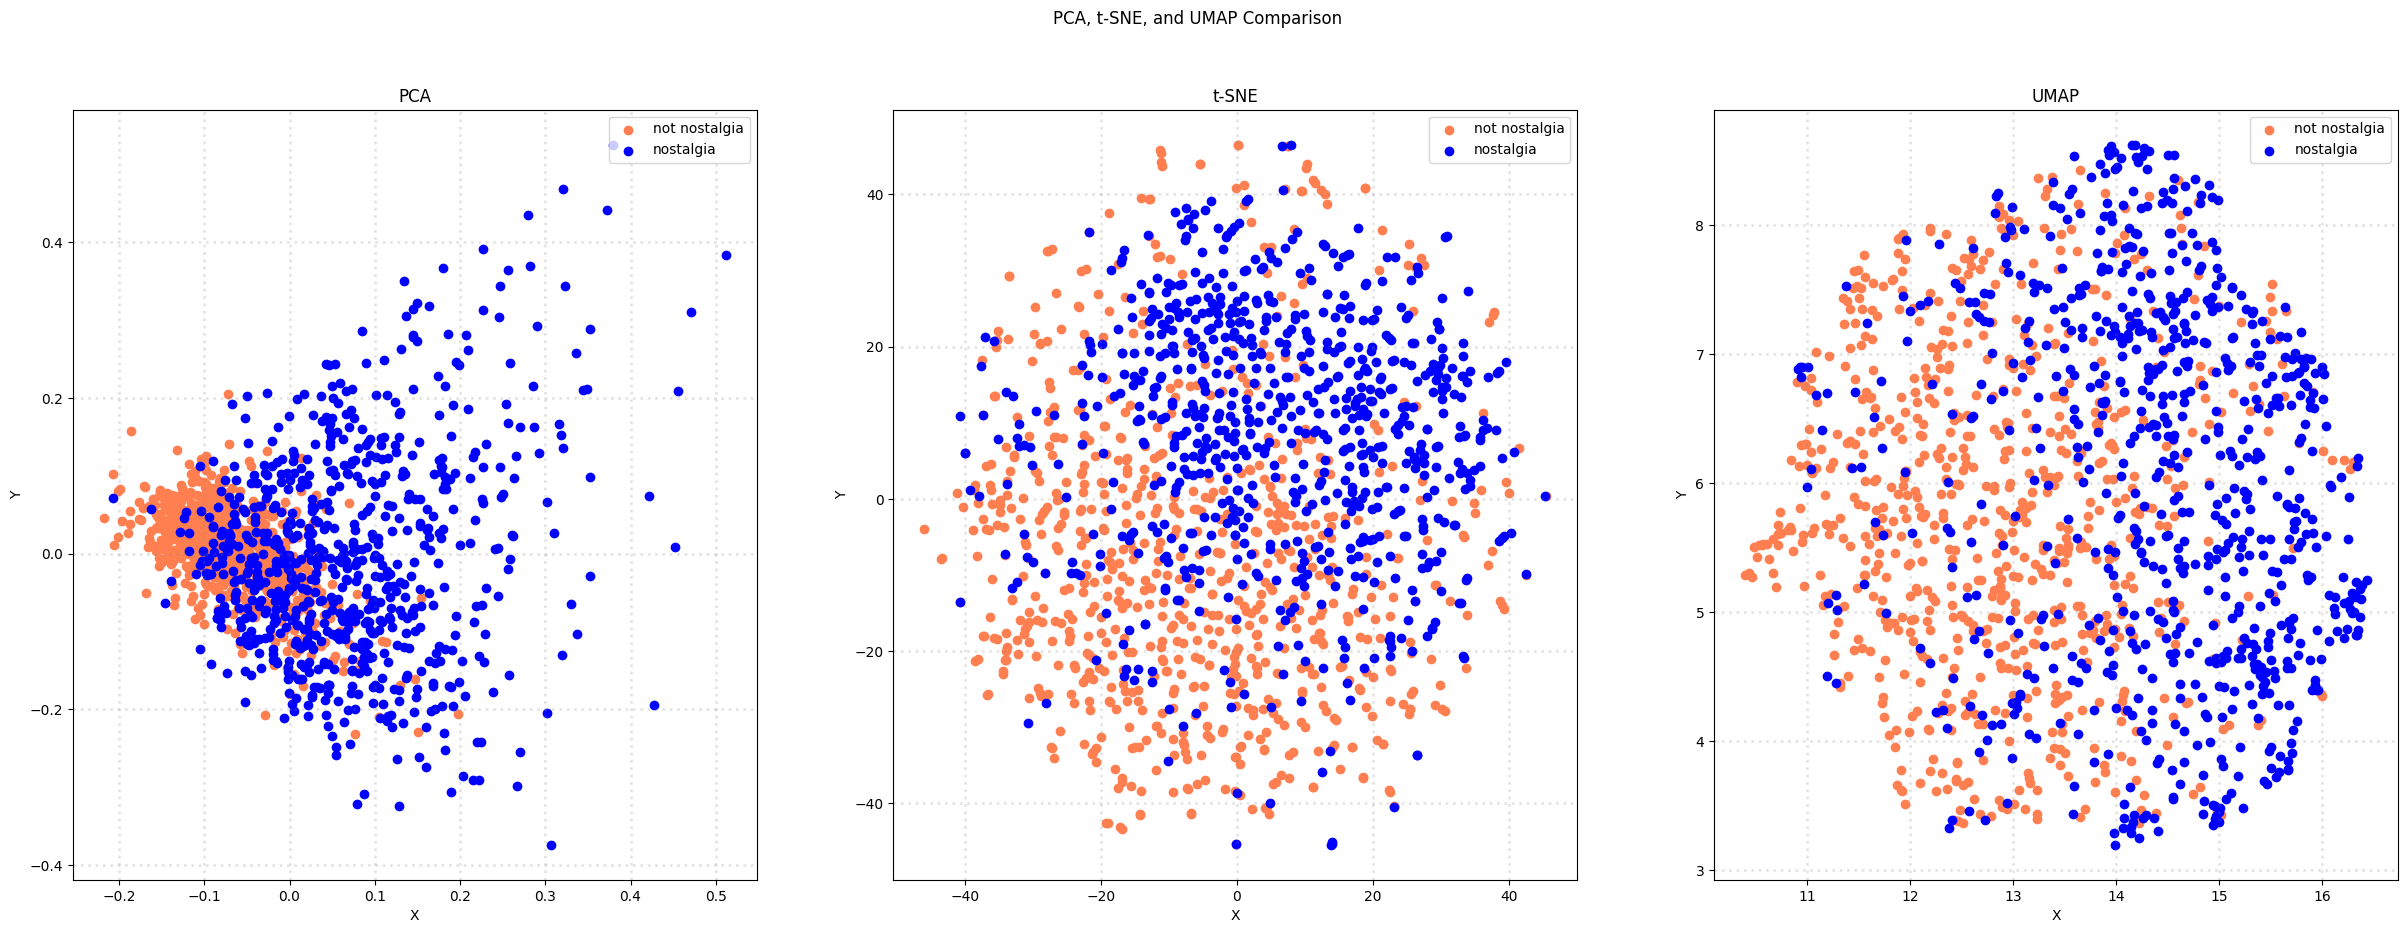

In [226]:
# Plot the results in subplots
col = ['coral', 'blue']
categories = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, df_reduced, title):
    for c, category in zip(col, categories):
        xs = df_reduced[df['sentiment'] == category].T[0]
        ys = df_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], df_pca_tfidfm, 'PCA')
plot_scatter(axes[1], df_tsne_tfidfm, 't-SNE')
plot_scatter(axes[2], df_umap_tfidfm, 'UMAP')

plt.show()

From the 2D PCA visualization above, the overall distribution of the points has a trend (like the shap '<').  Moreover, we can see blue points are scattered around while orange points are crowed together at the left side and have a nice trend. However, some part of them are intermixing.  
In the t-SNE graph we observe a more scattered distribution. You can see most of blue points are on the upper part of gragh while lower part contain more orange points. 
And with the UMAP graph, the trend of the points are not as well defined as the 20_news data. It's distrbution is more scattered. You can also see the most of blue points are located in upper region. But still a portion of the points are still intermixing.

Now let's try in tandem with our pattern augmented data:

In [227]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
df_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
df_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
df_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

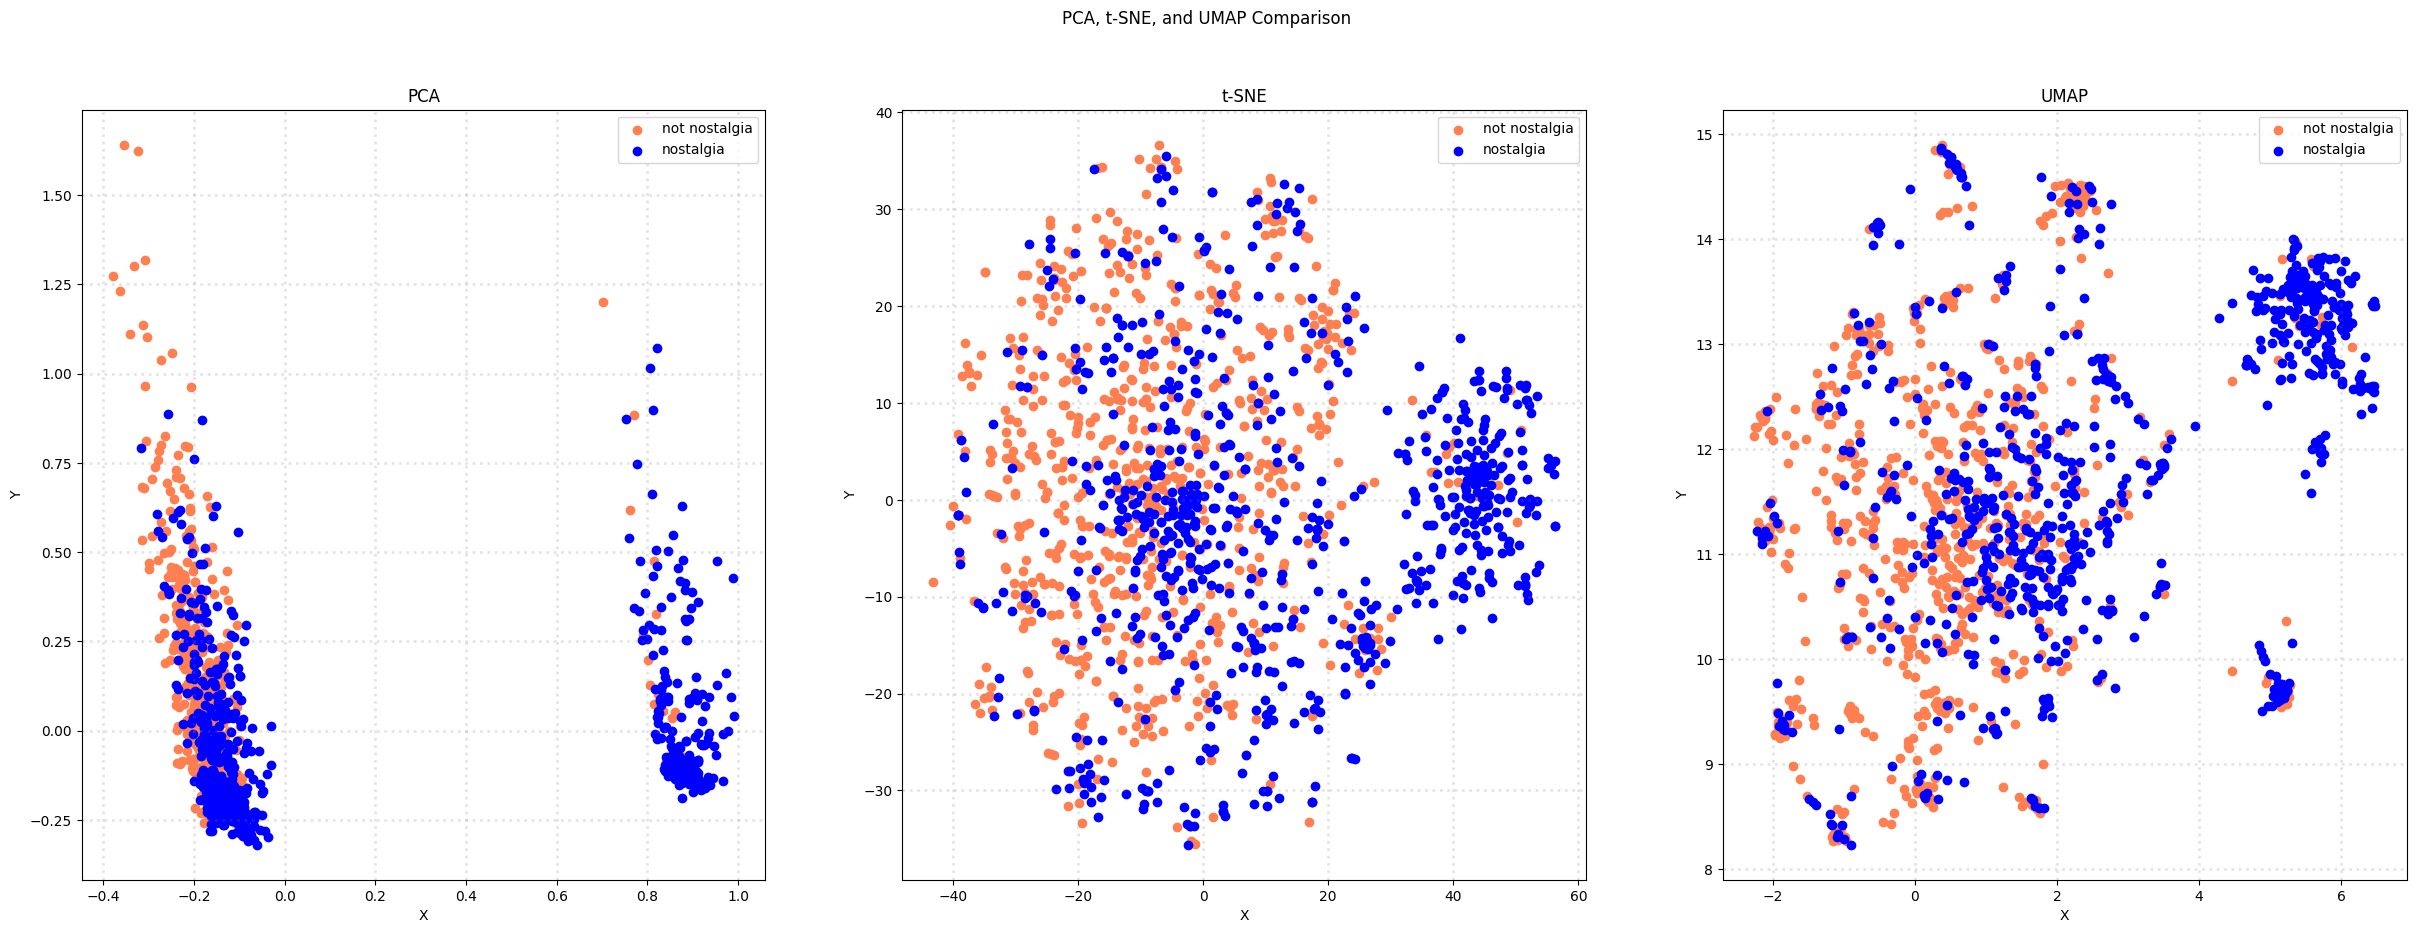

In [228]:
# Plot the results in subplots
col = ['coral', 'blue']
categories = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, df_reduced, title):
    for c, category in zip(col, categories):
        xs = df_reduced[df['sentiment'] == category].T[0]
        ys = df_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], df_pca_aug, 'PCA')
plot_scatter(axes[1], df_tsne_aug, 't-SNE')
plot_scatter(axes[2], df_umap_aug, 'UMAP')

plt.show()

the PCA visualization changed a lot from the previous version. You can see a clear trend in PCA visulization. This is because we use TFIDF matrix to analyze our data and the augmented effect is more obvious compared with the only term-doc matrix. Thus, the algorithm can captures the augmented effect will. 

The t-SNE graph also change a lot due to the augmenttd effect.  You can notice some blue points gather on the right side wihile other points arescattered around. This result indicate that the binary patterns may have significantly altered the relationships among the data points in high-dimensional space.

In the UMAP visualization. There are some of blue points gathering at the right side. The distribution of points is still scattered. Like previous two visualization the binary patterns may have significantly change the relationships among the data.   


### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [229]:
# Answer here


---

### 5.6 Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, `category_name`, into four binary attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes. The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concepts. Let us take a look at what we want to achieve in code. 

In [230]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.category)

LabelBinarizer()

In [231]:
df['bin_category'] = mlb.transform(df['category']).tolist()

In [232]:
df[0:9]

,sentiment,comment,wordsCnt,length,category,unigrams,tokenized_text,bin_category
0,not nostalgia,He was a singer with a golden voice that I lov...,60,long,1.0,"[He, was, a, singer, with, a, golden, voice, t...","{still, He, loving., the, but,, and, to, You, ...",[1]
1,nostalgia,The mist beautiful voice ever I listened to hi...,26,short,0.0,"[The, mist, beautiful, voice, ever, I, listene...","{still, forgotten, and, to, ever, love, an, wh...",[0]
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,74,long,0.0,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{forgot, but, the, sweet,, 17., pretensions, j...",[0]
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,68,long,1.0,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{granted, the, Mary, later, to, life, God, and...",[1]
4,nostalgia,listening to his songs reminds me of my mum wh...,13,short,0.0,"[listening, to, his, songs, reminds, me, of, m...","{reminds, me, of, my, who, everyday, songs, li...",[0]
5,nostalgia,"Every time I heard this song as a child, I use...",39,long,0.0,"[Every, time, I, heard, this, song, as, a, chi...","{still, as, time, touches, over, death,, to, a...",[0]
6,nostalgia,"My dad loved listening to Jim Reeves, when I w...",27,short,0.0,"[My, dad, loved, listening, to, Jim, Reeves, ,...","{teenager, but, the, to, dad, 70's, My, Reeves...",[0]
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...,34,long,0.0,"[i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...","{am, childhood, since, the, LISTENED, comes, ....",[0]
8,not nostalgia,Wherever you are you always in my heart,8,short,1.0,"[Wherever, you, are, you, always, in, my, heart]","{heart, you, are, my, Wherever, always, in}",[1]


### >>> **Exercise 19 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [233]:
# Answer here
mlb.fit(df.sentiment)
df['bin_category_name'] = mlb.transform(df['sentiment']).tolist()
df[0:9]

,sentiment,comment,wordsCnt,length,category,unigrams,tokenized_text,bin_category,bin_category_name
0,not nostalgia,He was a singer with a golden voice that I lov...,60,long,1.0,"[He, was, a, singer, with, a, golden, voice, t...","{still, He, loving., the, but,, and, to, You, ...",[1],[1]
1,nostalgia,The mist beautiful voice ever I listened to hi...,26,short,0.0,"[The, mist, beautiful, voice, ever, I, listene...","{still, forgotten, and, to, ever, love, an, wh...",[0],[0]
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,74,long,0.0,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{forgot, but, the, sweet,, 17., pretensions, j...",[0],[0]
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,68,long,1.0,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{granted, the, Mary, later, to, life, God, and...",[1],[1]
4,nostalgia,listening to his songs reminds me of my mum wh...,13,short,0.0,"[listening, to, his, songs, reminds, me, of, m...","{reminds, me, of, my, who, everyday, songs, li...",[0],[0]
5,nostalgia,"Every time I heard this song as a child, I use...",39,long,0.0,"[Every, time, I, heard, this, song, as, a, chi...","{still, as, time, touches, over, death,, to, a...",[0],[0]
6,nostalgia,"My dad loved listening to Jim Reeves, when I w...",27,short,0.0,"[My, dad, loved, listening, to, Jim, Reeves, ,...","{teenager, but, the, to, dad, 70's, My, Reeves...",[0],[0]
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...,34,long,0.0,"[i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...","{am, childhood, since, the, LISTENED, comes, ....",[0],[0]
8,not nostalgia,Wherever you are you always in my heart,8,short,1.0,"[Wherever, you, are, you, always, in, my, heart]","{heart, you, are, my, Wherever, always, in}",[1],[1]


---

# 6. Data Exploration

Sometimes you need to take a peek at your data to understand the relationships in your dataset. Here, we will focus in a similarity example. Let's take 3 documents and compare them.

In [234]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = df.iloc[50] # indicate the 50th record
random_record_1 = random_record_1['comment'] # Only need the comment in the record
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [235]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['i guess most of us leave it too late before we tell someone just how much we really love them']
['my name is thomas but know by tommy and my wifes name is laura and i always sing this to her']


In [236]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = tfidf_vect.transform(document_to_transform_1)
document_vector_count_2 = tfidf_vect.transform(document_to_transform_2)
document_vector_count_3 = tfidf_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]


In [237]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)[0, 0]
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)[0, 0]
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)[0, 0]

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)[0, 0]
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)[0, 0]
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)[0, 0]

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})


Cosine Similarity using count bw 1 and 2: 0.019116
Cosine Similarity using count bw 1 and 3: 0.004465
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


As expected, cosine similarity between a sentence and itself is 1. Between 2 entirely different sentences, it will be 0. 

We can assume that we have the more common features in the documents 1 and 2 than in documents 1 and 3. This reflects indeed in a higher similarity than that of sentences 1 and 2. 


---

# 7.1 Data Classification with TF-IDF feature by Bernoulli Naive Bayes classifier


# Use original data (nonaugmented) 

In [238]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB # Use BernoulliNB instead of MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(df[['category', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tfidfm_df, df['category'], test_size=0.3, random_state=42)

In [241]:
# Train the Bernoulli Naive Bayes classifier
nb_classifier = BernoulliNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8844444444444445

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8521    0.9399    0.8939       233
not nostalgia     0.9275    0.8249    0.8732       217

     accuracy                         0.8844       450
    macro avg     0.8898    0.8824    0.8835       450
 weighted avg     0.8885    0.8844    0.8839       450



# Use augmented data 

In [242]:
# Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(df[['category', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, df['category'], test_size=0.3, random_state=42)

In [245]:
# Train the Bernoulli Naive Bayes classifier
nb_classifier = BernoulliNB() 
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8866666666666667

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8583    0.9356    0.8953       233
not nostalgia     0.9235    0.8341    0.8765       217

     accuracy                         0.8867       450
    macro avg     0.8909    0.8849    0.8859       450
 weighted avg     0.8897    0.8867    0.8862       450



-----

## 8. Concluding Remarks

----

## 9. References

- Pandas cook book ([Recommended for starters](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html))
- [Pang-Ning Tan, Michael Steinbach, Vipin Kumar, Introduction to Data Mining, Addison Wesley](https://dl.acm.org/citation.cfm?id=1095618)